# SVM

Source: <https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2>

In [1]:
import matplotlib.pyplot as plot
import numpy as np
from utility import display, load_dataset, split_dataset, sigmoid
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import hinge_loss

Backpropagation class defining the Neural Network

In [2]:
class SVM:
    def __init__(self, verbose = False):
        self.verbose = verbose
        self.weights = np.zeros(0)
        
    @staticmethod
    def cost(x, y, w, re):
        # calculate hinge loss
        n = x.shape[0]
        distances = 1 - y * (np.dot(x, w))
        distances[distances < 0] = 0  # equivalent to max(0, distance)
        hinge_loss = re * (np.sum(distances) / n)

        # calculate cost
        cost = 1 / 2 * np.dot(w, w) + hinge_loss
        return cost
    
    @staticmethod
    def cost_gradient(bx, by, w, re):
        distance = 1 - (by * np.dot(bx, w))
        dw = np.zeros(len(w))
        
        for ind, d in enumerate(distance):
            if max(0, d) == 0:
                di = w
            else:
                di = w - (re * by[ind] * bx[ind])
            dw += di
        
        dw = dw/len(by)
        return dw

    def next_batch(self, x, y, batch_size):
        # loop over our dataset `X` in mini-batches of size `batchSize`
        for i in np.arange(0, x.shape[0], batch_size):
            # yield a tuple of the current batched data and labels
            yield (x[i:i + batch_size], y[i:i + batch_size])

    def fit(self, x, y, lr=0.05, epochs=10000, batch_size=100, e=1e-06, re=10000):
        # weights initialization
        self.weights = np.zeros(x.shape[1])
        loss_values = []
        
        for i in range(epochs):
            epoch_loss = []
            for (bx, by) in self.next_batch(x, y, batch_size):
                # calculate the gradient
                gradient = self.cost_gradient(bx, by, self.weights, re)

                # update weights
                self.weights -= lr * gradient

                # calculate the loss
                loss = self.cost(bx, by, self.weights, re)
                
                # display loss
                if self.verbose and i % 1000 == 0:
                    print(f'loss in iteration {i} -> {loss} \t')

                # stoppage criterion
                if len(epoch_loss) > 0 and abs(epoch_loss[-1] - loss) < e:
                    return loss_values
                    
                # collect loss values
                epoch_loss.append(loss)
            loss_values.append(np.average(epoch_loss))

        return loss_values

    def calculate(self, x):
        # Calculate x * W
        z = np.dot(x, self.weights)
        # Calculate the sigmoid
        return sigmoid(z)

    def predict(self, x):
        # Predict using sigmoid calculation and return binary result
        return self.calculate(x).round()

load training and test data from CSV file

In [3]:
dataset, target = load_dataset("data/banknote.csv")
train_x, train_y, test_x, test_y = split_dataset(dataset, target, 0.75)
print(f"Training set size: {len(train_x)}, Testing set size: {len(test_x)}")

Training set size: 1042, Testing set size: 328


train the model with training data and display the losses and test results

Accuracy: 0.8079268292682927
Precision: 0.820151590721405
Recall: 0.8079268292682927
F1 score: 0.8085544667763392
ROC AUC Score: 0.8152173913043479


/home/kalayci/projects/github/pyML/utility.py:38: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


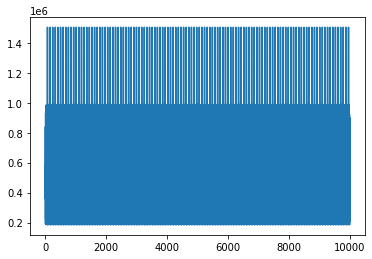

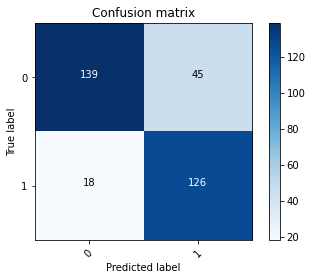

[0.8085544667763392, 0.8152173913043479]

In [4]:
model = SVM()
plot.plot(model.fit(train_x, train_y))
predictions = model.predict(test_x)
display(test_y, predictions)

Let's try scikit-learn [SVM](https://scikit-learn.org/stable/modules/svm.html)

Accuracy: 0.9969512195121951
Precision: 0.9969722455845248
Recall: 0.9969512195121951
F1 score: 0.9969523405670306
ROC AUC Score: 0.9972826086956521


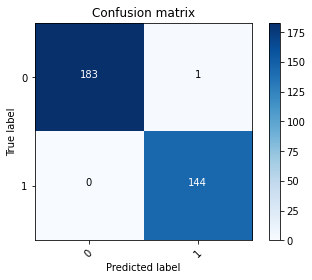

[0.9969523405670306, 0.9972826086956521]

In [5]:
model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)
display(test_y, predictions)